<a href="https://colab.research.google.com/github/bhatiap70077/Natural-Language-Processing/blob/main/Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Perfroming Hugging Face on Job Reviews from Glassdoor**

***Installing Required Libraries Modules***





In [52]:
!pip install transformers

In [53]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import nltk 
import itertools
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import string
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***Importing Dataset***

In [54]:
df = pd.read_excel('Jobs_Data.xlsx')

In [55]:
df

,Company,Jobs,Comment,Label
0,Tree of Life Canada,Customer Supply Chain Analyst,"""Overall great culture and PC Charity is amazi...",1
1,Tree of Life Canada,Customer Supply Chain Analyst,"""People in the team are nice""",1
2,Tree of Life Canada,Customer Supply Chain Analyst,"""Good pay""",1
3,Tree of Life Canada,Customer Supply Chain Analyst,"""It’s a rewarding role, management are good""",1
4,Tree of Life Canada,Customer Supply Chain Analyst,"""good benefits and oppertunity to grow within ...",1
...,...,...,...,...
93,"JELD-WEN, inc",Data Analyst,good benefits and oppertunity to grow within c...,1
94,"JELD-WEN, inc",Data Analyst,life balance did not appear to be great for fu...,0
95,"JELD-WEN, inc",Data Analyst,bad pay too far to commute,0
96,"JELD-WEN, inc",Data Analyst,Awful management,0


***Cleaning Data***

In [64]:
# Preprocessing text using piped methods over training data
training_data_clean = (
    # start with training data
    df
    # convert to lower case
    .assign(clean_document= lambda x:[text.lower() for text in x.Comment]) 
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
    # remove leading & trainling spaces 
    .assign(clean_document = lambda x: [text.strip() for text in x.clean_document])
    # remove all the '\n' values with space
    .assign(clean_document= lambda x: [re.sub(r"\n","",text) for text in x.clean_document] )
    # word tokenize
    .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
   # Lemmatising the words
    .assign(word_token= lambda x: [[WordNetLemmatizer().lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
     # input to sklearn
    #  # input to sklearn
    # .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])
)


In [65]:
training_data_clean

,Company,Jobs,Comment,Label,clean_document,word_token
0,Tree of Life Canada,Customer Supply Chain Analyst,"""Overall great culture and PC Charity is amazi...",1,overall great culture and pc charity is amazing,"[pc, amazing, culture, charity, overall, great]"
1,Tree of Life Canada,Customer Supply Chain Analyst,"""People in the team are nice""",1,people in the team are nice,"[team, nice, people]"
2,Tree of Life Canada,Customer Supply Chain Analyst,"""Good pay""",1,good pay,"[good, pay]"
3,Tree of Life Canada,Customer Supply Chain Analyst,"""It’s a rewarding role, management are good""",1,its a rewarding role management are good,"[good, management, rewarding, role]"
4,Tree of Life Canada,Customer Supply Chain Analyst,"""good benefits and oppertunity to grow within ...",1,good benefits and oppertunity to grow within c...,"[within, good, oppertunity, company, benefit, ..."
...,...,...,...,...,...,...
93,"JELD-WEN, inc",Data Analyst,good benefits and oppertunity to grow within c...,1,good benefits and oppertunity to grow within c...,"[within, good, oppertunity, company, benefit, ..."
94,"JELD-WEN, inc",Data Analyst,life balance did not appear to be great for fu...,0,life balance did not appear to be great for fu...,"[balance, time, great, life, appear, feel, gen..."
95,"JELD-WEN, inc",Data Analyst,bad pay too far to commute,0,bad pay too far to commute,"[pay, commute, bad, far]"
96,"JELD-WEN, inc",Data Analyst,Awful management,0,awful management,"[management, awful]"


***Adding polarity column using Text Blob***

In [124]:
#Using Text Blob pretrained model
#Importing model

from textblob import TextBlob

In [125]:
#Generating Y pred using textBlob

textblob_Y = training_data_clean['clean_document'].apply(lambda c: 1 if TextBlob(c).sentiment.polarity >0.5 else 0)

In [126]:
dd = pd.DataFrame(textblob_Y)

In [127]:
dd

,clean_document
0,0
1,1
2,1
3,1
4,1
...,...
93,1
94,1
95,0
96,0


***Adding Polarity Column to the existing Dataset***

In [128]:
df['Polarity'] = dd
df2 = df

In [129]:
df2

,Company,Jobs,Comment,Label,Polarity
0,Tree of Life Canada,Customer Supply Chain Analyst,"""Overall great culture and PC Charity is amazi...",1,0
1,Tree of Life Canada,Customer Supply Chain Analyst,"""People in the team are nice""",1,1
2,Tree of Life Canada,Customer Supply Chain Analyst,"""Good pay""",1,1
3,Tree of Life Canada,Customer Supply Chain Analyst,"""It’s a rewarding role, management are good""",1,1
4,Tree of Life Canada,Customer Supply Chain Analyst,"""good benefits and oppertunity to grow within ...",1,1
...,...,...,...,...,...
93,"JELD-WEN, inc",Data Analyst,good benefits and oppertunity to grow within c...,1,1
94,"JELD-WEN, inc",Data Analyst,life balance did not appear to be great for fu...,0,1
95,"JELD-WEN, inc",Data Analyst,bad pay too far to commute,0,0
96,"JELD-WEN, inc",Data Analyst,Awful management,0,0


***Cleaning New Dataset***

In [130]:
# Preprocessing text using piped methods over training data
training_data_clean_2 = (
    # start with training data
    df2
    # convert to lower case
    .assign(clean_document= lambda x:[text.lower() for text in x.Comment]) 
    # remove punctuation
    .assign(clean_document= lambda x: [re.sub("[^\w\s]","",text) for text in x.clean_document])
    # remove leading & trainling spaces 
    .assign(clean_document = lambda x: [text.strip() for text in x.clean_document])
    # remove all the '\n' values with space
    .assign(clean_document= lambda x: [re.sub(r"\n","",text) for text in x.clean_document] )
    # word tokenize
    .assign(word_token= lambda x: [nltk.word_tokenize(text) for text in x.clean_document] )
    # # remove stop words
    .assign(word_token= lambda x: [list(set(list_of_words).difference(stop_words)) for list_of_words in x.word_token])
   # Lemmatising the words
    .assign(word_token= lambda x: [[WordNetLemmatizer().lemmatize(a_word) for a_word in list_of_words] for list_of_words in x.word_token ])
     # input to sklearn
    #  # input to sklearn
    # .assign(document_to_sklearn= lambda x: [" ".join(map(str,list_of_words)) for list_of_words in x.word_token ])
)

In [131]:
training_data_clean_2

,Company,Jobs,Comment,Label,Polarity,clean_document,word_token
0,Tree of Life Canada,Customer Supply Chain Analyst,"""Overall great culture and PC Charity is amazi...",1,0,overall great culture and pc charity is amazing,"[pc, amazing, culture, charity, overall, great]"
1,Tree of Life Canada,Customer Supply Chain Analyst,"""People in the team are nice""",1,1,people in the team are nice,"[team, nice, people]"
2,Tree of Life Canada,Customer Supply Chain Analyst,"""Good pay""",1,1,good pay,"[good, pay]"
3,Tree of Life Canada,Customer Supply Chain Analyst,"""It’s a rewarding role, management are good""",1,1,its a rewarding role management are good,"[good, management, rewarding, role]"
4,Tree of Life Canada,Customer Supply Chain Analyst,"""good benefits and oppertunity to grow within ...",1,1,good benefits and oppertunity to grow within c...,"[within, good, oppertunity, company, benefit, ..."
...,...,...,...,...,...,...,...
93,"JELD-WEN, inc",Data Analyst,good benefits and oppertunity to grow within c...,1,1,good benefits and oppertunity to grow within c...,"[within, good, oppertunity, company, benefit, ..."
94,"JELD-WEN, inc",Data Analyst,life balance did not appear to be great for fu...,0,1,life balance did not appear to be great for fu...,"[balance, time, great, life, appear, feel, gen..."
95,"JELD-WEN, inc",Data Analyst,bad pay too far to commute,0,0,bad pay too far to commute,"[pay, commute, bad, far]"
96,"JELD-WEN, inc",Data Analyst,Awful management,0,0,awful management,"[management, awful]"


***Doing Bag Of Words***

In [132]:
#Creating vocabulary

all_words = list(itertools.chain(*training_data_clean_2.word_token))
vocabulary = list(set(all_words))

len(vocabulary)

33

In [133]:
# Generating word frequncey 
word_counts = Counter(all_words)

#Top 100 most common words
my_vocab = word_counts.most_common(100)

#Most common Word
word_counts.most_common(10)

[('good', 33),
 ('culture', 24),
 ('great', 24),
 ('intern', 22),
 ('pay', 21),
 ('management', 21),
 ('benefit', 21),
 ('pc', 12),
 ('amazing', 12),
 ('charity', 12)]

In [134]:
#Creating vocab for text extraction
common_vocab = [most[0] for most in my_vocab]

In [135]:
# Vectorizing the training data 

vectorizer = CountVectorizer(vocabulary = common_vocab)
bow_matrix = vectorizer.fit_transform([data for data in training_data_clean_2['clean_document']])


In [136]:
# Creating the BOW matrix for train

train_bow_2 = pd.DataFrame(bow_matrix.toarray())

train_bow_2.columns = vectorizer.get_feature_names()
train_bow_2['label'] = training_data_clean_2['Polarity']
train_bow_2

,good,culture,great,intern,pay,management,benefit,pc,amazing,charity,...,role,within,oppertunity,company,grow,commute,bad,far,awful,label
0,0,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,1,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,1
94,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
95,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
96,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


***Performing Hugging Face***

In [137]:
#using Hugging Face Transformers
# import the pipeline for sentiment analysis
from transformers import pipeline
classifier = pipeline("sentiment-analysis",model='distilbert-base-uncased-finetuned-sst-2-english')
classifier

In [139]:
#Generating the huggingface report
#Generating Y pred for Huggingface 

huggingFace_Y =  training_data_clean_2['clean_document'].apply(lambda x: 1 if classifier(x)[0]['label'] =='POSITIVE' else 0)
print('Huggingface Result: ')
huggingFace_result = classification_report(training_data_clean_2['Polarity'],huggingFace_Y)
print(huggingFace_result)

Huggingface Result: 
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        42
           1       0.79      0.79      0.79        56

    accuracy                           0.76        98
   macro avg       0.75      0.75      0.75        98
weighted avg       0.76      0.76      0.76        98



***NB model using Pycaret***

In [117]:
pip install pycaret

In [118]:
from sklearn.model_selection import train_test_split

x=training_data_clean[['clean_document']]   
Y=training_data_clean[['Polarity']]

X_train, X_test, y_train, y_test = train_test_split(x,Y, test_size=0.3, random_state=123)

In [119]:
from pycaret.classification import *

In [120]:
s = setup(data = train_bow_2, target='label',
          numeric_features=vectorizer.get_feature_names(),
          session_id=123,verbose=False,silent=True)

In [121]:
m = create_model('nb')

Accuracy     AUC  Recall  Prec.      F1   Kappa     MCC
Split  Fold                                                         
CV-Val 0       0.8571  0.9167  0.7500    1.0  0.8571  0.7200  0.7500
       1       0.8571  0.9167  0.7500    1.0  0.8571  0.7200  0.7500
       2       0.8571  0.8333  0.7500    1.0  0.8571  0.7200  0.7500
       3       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
       4       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
       5       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
       6       1.0000  1.0000  1.0000    1.0  1.0000  1.0000  1.0000
       7       0.8571  0.9000  0.8000    1.0  0.8889  0.6957  0.7303
       8       0.8333  0.7500  0.7500    1.0  0.8571  0.6667  0.7071
       9       0.8333  0.7500  0.7500    1.0  0.8571  0.6667  0.7071
       Mean    0.9095  0.9067  0.8550    1.0  0.9175  0.8189  0.8395
       Std     0.0744  0.0946  0.1193    0.0  0.0680  0.1490  0.1319
Train  NaN     0.9118  0.9295  0.8537    1.0  0.9211  0.8225  0.8357

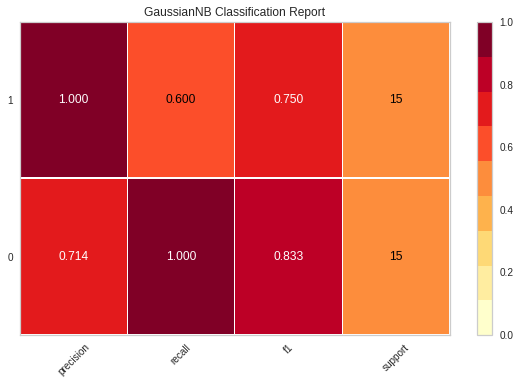

In [122]:
plot_model(m,'class_report')

In [123]:
best  = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.035
knn,K Neighbors Classifier,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.136
dt,Decision Tree Classifier,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.032
svm,SVM - Linear Kernel,1.0000,0.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.026
ridge,Ridge Classifier,1.0000,0.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.028
rf,Random Forest Classifier,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.485
ada,Ada Boost Classifier,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.092
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.056
et,Extra Trees Classifier,1.0000,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,0.417
nb,Naive Bayes,0.9095,0.9067,0.855,1.0000,0.9175,0.8189,0.8395,0.022
